<a href="https://colab.research.google.com/github/hazra-kerubo/A--Dijkstra--Simulated-Annealing-Algorithm/blob/main/Hazra_Naive_Bayes_classification_Hypothyroid_Dataset_30thMay_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****Questions and aim of this work****
1. Documentation of the implementation using Bayesian Networks:
2. Describe the problem being solved
3. Describe the chosen domain (scenario), and choice of tools for your modeling.
4. Design the network — Indicate your probability priors, and the posteriors
5. Describe your inference procedure, and the algorithm for this.
6. Ensure to indicate all the parameters of the network, and show all the diagrammatic representations


Bayesian Networks (also known as Belief Networks) are probabilistic graphical models that represent a set of variables and their conditional dependencies using a directed acyclic graph (DAG). They are powerful tools for reasoning under uncertainty and are widely used in fields like AI, medical diagnosis, and machine learning.


Bayesian Networks provide a structured way to represent and reason about uncertain information. They capture both the qualitative structure of the domain (through the DAG) and the quantitative aspect (through CPTs). Inference enables decision-making, prediction, and diagnosis in complex probabilistic systems.

# Question 2
**Describe the chosen domain (scenario), and choice of tools for your modeling**

**Medical Diagnosis / Healthcare**

The chosen domain for this project is medical diagnosis, specifically focused on detecting thyroid-related disorders.

The thyroid gland plays a vital role in regulating the body’s metabolism, and any dysfunction can lead to hypothyroidism (underactive thyroid) or hyperthyroidism (overactive thyroid).

Early detection of such conditions is critical for effective treatment and patient well-being.

 **Hypothyroid Detection**

In this scenario, we are working with the [hypothyroid dataset](https://www.kaggle.com/datasets/nguyenthilua/hypothyroidcsv/data), which contains historical patient information including clinical attributes such as:

1. TSH (Thyroid Stimulating Hormone) levels,

2. T3 and TT4 hormone measurements,

3. Medical history like prior thyroid surgery or medication,

4. Demographics like age and sex.

The goal is to build a classification model that predicts whether a patient is hypothyroid or not based on these features. Automating this prediction helps medical professionals screen patients more efficiently and prioritize care.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.metrics import confusion_matrix


# Suppress all warnings
warnings.filterwarnings("ignore")

# Generate a warning
warnings.warn("This is a test warning!", UserWarning)



# sns.set_style()

df = pd.read_csv('/content/hypothyroid.csv')
df.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
df.binaryClass.value_counts()
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

# Question 3 -
**Design the network — Indicate your probability priors, and the posteriors**

In [ ]:
prior_probs = df['binaryClass'].value_counts(normalize=True)
print(prior_probs)

binaryClass
0    0.922853
1    0.077147
Name: proportion, dtype: float64


The probability of testing positive with hypothyroid is around 92% , the probability of testing negative is around 7%

In [ ]:
# from sklearn.naive_bayes import CategoricalNB
# POSTERIOR PROBS

# model = CategoricalNB()
# model.fit(X_train, y_train)

# Predict probabilities (posterior) for each class
# posterior_probs = model.predict_proba(X_test)


In [ ]:
df.dtypes

,0
age,object
sex,object
on thyroxine,object
query on thyroxine,object
on antithyroid medication,object
sick,object
pregnant,object
thyroid surgery,object
I131 treatment,object
query hypothyroid,object


In [ ]:
#convert object to corresponding data type
#cols = df.columns[df.dtypes.eq('object')]
#df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
#df.dtypes

In [ ]:
## size of the dataset
print('There is {} observations with {} features'.format(df.shape[0], df.shape[1]))


There is 3772 observations with 30 features


In [ ]:
# checking the columns
df.columns.values.tolist() #converting column names to a list

['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source',
 'binaryClass']

 **Column description**

 * Binaryclass: - whether the patient has tested positive or negative for hypothyroidism
 * age : the age of the patient
 * sex: the gender of the
 * on_thyroxine: whether the patient is on the thyroxine drug or not
query_on_thyroxine: whether the patient has queries on the thyroxine drug or not
 * on_antithyroid_medication: whether the patient is on medication to decrease release of thyroid hormones or not
 * thyroid_surgery: whether the patient has undergone thyroid surgery or not
 * query_hypothyroid: whether a patient has queries on hypothyroidism(under-active thyroid) hormone or not
 * query_hyperthyroid: whether the patient has queries on hyperthyroism(over-active thyroid) or not
 * pregnant: whether the patient is pregnant or not
 * sick: whether the patient is sick or not
 * tumor: whether the patient has had a tumor or not
 * lithium: whether the patient is on lithium drugs or not
 * goitre: whether the patient has goitre or not
 * TSH_measured: Whether the patient's levels of thyroid stimulating
   hormone have been measured or not
 * TSH : level of thyroid stimulating hormones in the patient
 * T3_measured:whether the patient's levels of triiodothyronine hormone
  have been measured or not
 * T3: levels of triiodothyronine hormone in the patient
 * TT4_measured: whether the patient's levels of total thyroxine hormones
  has been measured or not
 * TT4: the levels of the total thyroxine hormones in the patient
   T4U_measured: whether the patient's thyroid utilization rate has been tested or not
T4U: the rate of thyroid utilization in a patient
FTI_measured: free thyroid index: whether the patient's thyroid binding capacity has been measured or not
FTI: thyroid binding index of a patient
TBG_measured: whether a patient's Thyroxine-binding globulin has been measured or not
TBG: the level of thyroxine binding globulin in a patient

**Data Preparation**

In [ ]:
# checking for null values
df.isnull().values.any()

np.False_

In [ ]:
# replacing the ? values with nan
df.replace('?', np.nan, inplace= True)

In [ ]:
# now checking for null values
df.isnull().values.sum()

np.int64(6064)

There are 6064 null values in the dataset

In [ ]:
# checking the total number of null values per column
df.isna().sum()

,0
age,1
sex,150
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0
query hypothyroid,0


There are null values of the following columns
* Age - 1
* Sex - 150
* TSH - 369
* T3 -  769
* TT4 - 231
* T4U - 387
* TBG - 3772

In [ ]:
# check for missing values in each column  and print the percentage of missing data per column.
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{}-{}%'.format(col,round(pct_missing*100)))

age-0%
sex-4%
on thyroxine-0%
query on thyroxine-0%
on antithyroid medication-0%
sick-0%
pregnant-0%
thyroid surgery-0%
I131 treatment-0%
query hypothyroid-0%
query hyperthyroid-0%
lithium-0%
goitre-0%
tumor-0%
hypopituitary-0%
psych-0%
TSH measured-0%
TSH-10%
T3 measured-0%
T3-20%
TT4 measured-0%
TT4-6%
T4U measured-0%
T4U-10%
FTI measured-0%
FTI-10%
TBG measured-0%
TBG-100%
referral source-0%
binaryClass-0%


The % of % of missing values in the dataset is as follows

* Sex - 150
* TSH - 10%
* T3 - 20%
* TT4 - 6%
* T4U - 10%
* TBG - 100% - We will drop this column since it is not relevant in our study

Dropping TBG column since its has 100% null values

In [ ]:
# dropping TBG column since its has 100% null values
df.drop('TBG', axis=1, inplace=True)

# To confirm it's removed
print(df.columns)

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source',
       'binaryClass'],
      dtype='object')


In [ ]:
df.shape

(3772, 29)

Dealing with missing values

In [ ]:
# checking for null values in the pregnancy column
df['sex'].isnull().sum()

np.int64(150)

**Dealing with Numeric Columns**

In [ ]:
# Columns expected to be numeric
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Convert these columns to float, coercing errors to NaN
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Print datatypes and count of NaNs
print(df[numeric_columns].dtypes)
print(df[numeric_columns].isna().sum())


age    float64
TSH    float64
T3     float64
TT4    float64
T4U    float64
FTI    float64
dtype: object
age      1
TSH    369
T3     769
TT4    231
T4U    387
FTI    385
dtype: int64


In [ ]:
# Convert columns to float and fill missing values with the column mean
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure numeric
    df[col].fillna(df[col].mean(), inplace=True)       # Fill NaNs with mean

# Confirm changes
print(df[numeric_columns].isna().sum())

age    0
TSH    0
T3     0
TT4    0
T4U    0
FTI    0
dtype: int64


In [ ]:
df.isnull().sum()

,0
age,0
sex,150
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0
query hypothyroid,0


**Dealing with categorical columns**

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save the encoder for inverse_transform if needed

# Check the result
print(df.head())

    age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0  41.0    0             0                   0                          0   
1  23.0    0             0                   0                          0   
2  46.0    1             0                   0                          0   
3  70.0    0             1                   0                          0   
4  70.0    0             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0     0         0                0               0                  0  ...   
1     0         0                0               0                  0  ...   
2     0         0                0               0                  0  ...   
3     0         0                0               0                  0  ...   
4     0         0                0               0                  0  ...   

       T3  TT4 measured    TT4  T4U measured    T4U  FTI measured   

In [ ]:
df.dtypes

,0
age,float64
sex,int64
on thyroxine,int64
query on thyroxine,int64
on antithyroid medication,int64
sick,int64
pregnant,int64
thyroid surgery,int64
I131 treatment,int64
query hypothyroid,int64


In [ ]:
numeric_columns

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [ ]:
categorical_cols

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source'],
      dtype='object')

Descriptive Statistics for Numerical Columns:
               age          TSH           T3          TT4          T4U  \
count  3772.000000  3772.000000  3772.000000  3772.000000  3772.000000   
mean     51.735879     5.086766     2.013500   108.319345     0.995000   
std      20.082295    23.290853     0.738262    34.496511     0.185156   
min       1.000000     0.005000     0.050000     2.000000     0.250000   
25%      36.000000     0.600000     1.700000    89.000000     0.890000   
50%      54.000000     1.600000     2.013500   106.000000     0.995000   
75%      67.000000     3.800000     2.200000   123.000000     1.070000   
max     455.000000   530.000000    10.600000   430.000000     2.320000   

               FTI  
count  3772.000000  
mean    110.469649  
std      31.355087  
min       2.000000  
25%      94.000000  
50%     110.000000  
75%     121.250000  
max     395.000000  


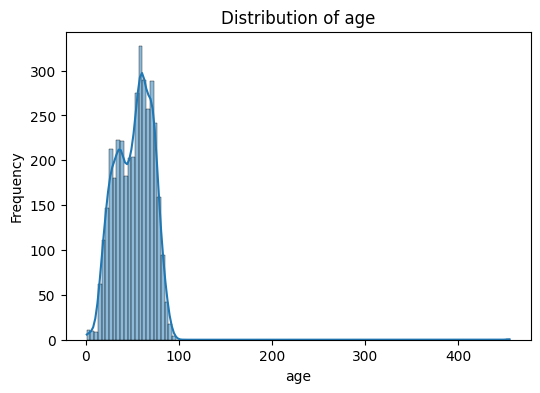

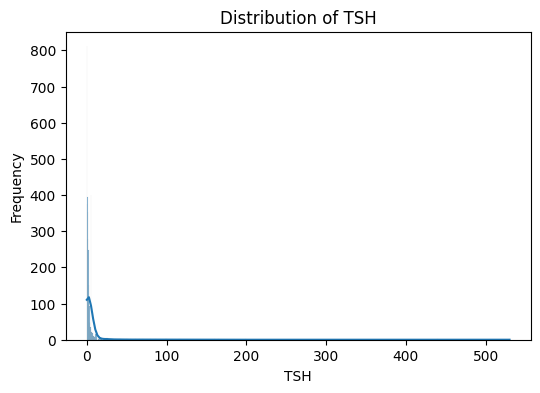

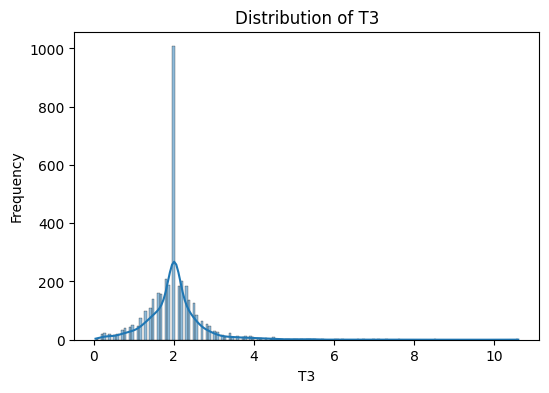

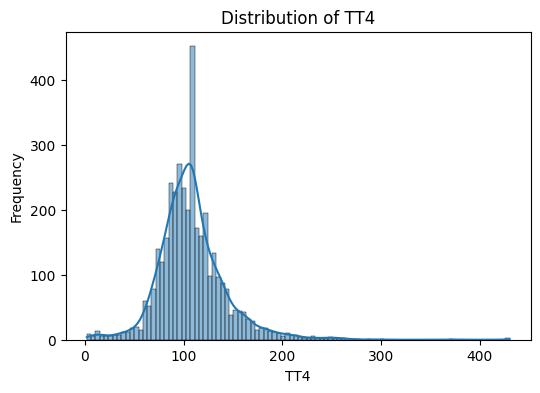

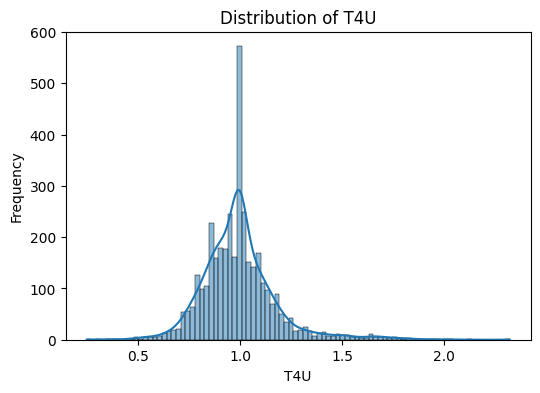

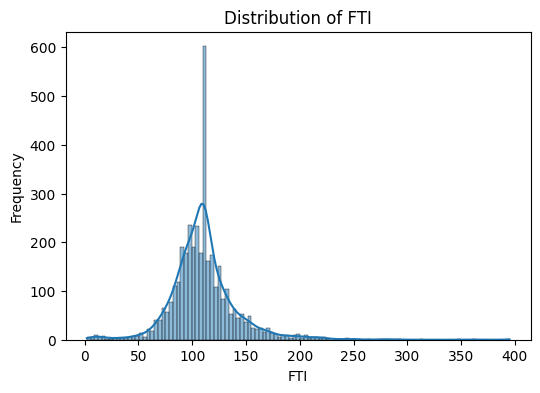

In [ ]:
# Identify categorical and numerical columns

# Univariate Analysis for Numerical Columns
print("Descriptive Statistics for Numerical Columns:")
print(df[numeric_columns].describe())

# Plot histograms for numerical columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()




In [ ]:
# Convert all column names to lowercase (optional for easier handling)
df.columns = [col.lower() for col in df.columns]





# Question 3
** What are the Prior Probabilities **

In [ ]:
prior_probs = df['binaryclass'].value_counts(normalize=True)
print(prior_probs)

binaryclass
1    0.922853
0    0.077147
Name: proportion, dtype: float64


In [ ]:
# Define features and target
X = df.drop("binaryclass", axis=1)
y = df["binaryclass"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions
y_pred = nb_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.25298013245033113

Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.98      0.17        58
           1       0.99      0.19      0.32       697

    accuracy                           0.25       755
   macro avg       0.54      0.59      0.25       755
weighted avg       0.92      0.25      0.31       755


Confusion Matrix:
 [[ 57   1]
 [563 134]]


**Model summary**

1. Accuracy  (25.3%)
This means the model is correctly predicting the class only about 25% of the time. This is very low and indicates poor model performance.
Class 0 The majority class – label 0 = "P")

2. Precision (0.99)
 Out of all predicted class 0, 99% were actually class 0.

3. Recall (0.19)
Out of all actual class 0 samples, the model correctly predicted only 19%.

4. F1-score(0.32)
Harmonic mean of precision and recall — reflects the imbalance

**Posterior Probabilities**

In [ ]:
# Predict probabilities (posterior) for each class
posterior_probs = nb_model.predict_proba(X_test)


**Hyperparameter Tuning**

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define hyperparameter grid
params = {'alpha': [0.1, 0.5, 1.0]}

# Set up GridSearchCV with CategoricalNB
grid = GridSearchCV(CategoricalNB(), param_grid=params, scoring='f1_macro', cv=5)
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0]}, scoring='f1_macro')

In [ ]:
# Best model
best_model = grid.best_estimator_
print("Best alpha:", grid.best_params_)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best alpha: {'alpha': 0.1}

Accuracy: 0.9748344370860927

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       697
           1       0.93      0.72      0.82        58

    accuracy                           0.97       755
   macro avg       0.96      0.86      0.90       755
weighted avg       0.97      0.97      0.97       755


Confusion Matrix:
 [[694   3]
 [ 16  42]]


The model almost perfectly identifies negative cases (class 0).

It does reasonably well identifying positive cases, though 16 were missed (FN).



# Question 5

**Describe your inference procedure, and the algorithm for this**

**Inference Procedure**

The inference process involves predicting the class (binaryClass) — whether a patient has hypothyroidism (P or 0) or not (N or 1) — based on the given medical and diagnostic attributes.

Each patient record consists of multiple features such as age, sex, TSH, T3, TT4 along with categorical and numerical medical attributes.

# Question 6

Ensure to indicate all the parameters of the network, and show all the diagrammatic representations

In [20]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

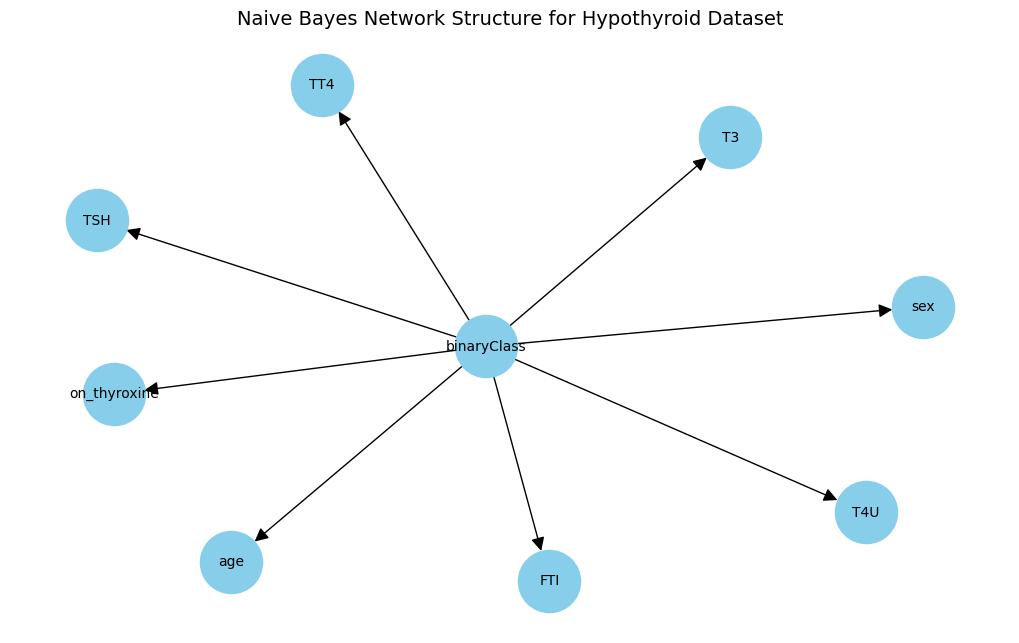

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define the class node (target variable)
target_node = 'binaryClass'

# Replace these with your actual feature columns
feature_nodes = ['sex', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'on_thyroxine']

# Add edges from the class node to each feature (Naive Bayes assumption)
for feature in feature_nodes:
    G.add_edge(target_node, feature)

# Draw the network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, arrowsize=20)
plt.title("Naive Bayes Network Structure for Hypothyroid Dataset", fontsize=14)
plt.show()
